<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/master/Training_held_out_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
#from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [104]:
import pandas as pd
url = 'https://raw.githubusercontent.com/francotestori/aauba_02/master/resources/audio_digits.csv'
df = pd.read_csv(url,index_col=0)
len(df)

23666

In [134]:
df.head()

,mfcc_0_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,...,ddmfcc_4_std,ddmfcc_5_std,ddmfcc_6_std,ddmfcc_7_std,ddmfcc_8_std,ddmfcc_9_std,ddmfcc_10_std,ddmfcc_11_std,ddenergy_std,digit
0,-361.668962,53.859608,-6.401287,10.504276,-3.063851,6.977546,-10.760357,9.866350,-7.370083,5.051000,...,7.798867,8.156207,5.955693,6.824333,9.274772,7.424050,7.378358,6.327442,0.002906,zero
1,-344.429501,62.971646,2.681298,32.594575,8.551349,3.027861,-19.559357,-7.843833,-16.635529,2.141704,...,9.655708,13.889084,14.058253,10.832590,14.331551,11.756045,7.560719,11.408998,0.020434,zero
2,-381.906240,131.083215,2.012445,-2.563179,-15.922072,-7.889542,-20.937417,-0.064021,-10.726910,-9.290048,...,8.587932,7.835087,9.674393,8.459633,6.429986,6.019982,6.302291,6.111948,0.006472,zero
3,-329.006034,89.473208,-8.629773,41.554231,9.980941,-7.126969,-1.424785,-17.449013,9.463047,4.690114,...,13.925842,11.329843,9.734676,12.571344,7.648433,7.622476,9.617163,8.681354,0.018406,zero
4,-407.817308,113.359332,-15.943540,37.747222,12.717220,-35.935848,-33.958903,-1.712428,-7.958551,-10.802430,...,11.950545,10.403010,7.634684,10.204372,11.217721,5.840141,3.973669,5.038977,0.005959,zero


In [136]:
from sklearn.model_selection import train_test_split

df_features = df.loc[:, df.columns != 'digit']
df_target = df['digit'] # DIGIT ES LO QUE QUEREMOS PREDECIR

X, X_test, y, y_test = train_test_split(df_features.values, df_target.values, test_size=0.3, random_state=4589,stratify=df_target.values)
#X_train, X_test, y_train, y_test
print(f'Entrenamiento: {len(X)}')
#print('Validacion: {}'.format(len(x_val)))
print(f'Held-out: {len(X_test)}')

Entrenamiento: 16566
Held-out: 7100


In [54]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)


In [7]:
pd.Series(y).unique()

array(['eight', 'three', 'four', 'zero', 'two', 'one', 'five', 'nine',
       'seven', 'six'], dtype=object)

In [8]:
for k,title in enumerate(pd.Series(y).unique()):
    print(f'Y >  {title}', end='\t')
    perc_train = pd.Series(y).value_counts(normalize=True)
    perc_test = pd.Series(y_test).value_counts(normalize=True)
    print(f'Entrenamiento:{perc_train[k]:.5}', end='\t')
    print(f'Held-out:{perc_train[k]:.5}')

Y >  eight	Entrenamiento:0.10045	Held-out:0.10045
Y >  three	Entrenamiento:0.10039	Held-out:0.10039
Y >  four	Entrenamiento:0.10027	Held-out:0.10027
Y >  zero	Entrenamiento:0.10021	Held-out:0.10021
Y >  two	Entrenamiento:0.10014	Held-out:0.10014
Y >  one	Entrenamiento:0.10008	Held-out:0.10008
Y >  five	Entrenamiento:0.099903	Held-out:0.099903
Y >  nine	Entrenamiento:0.099602	Held-out:0.099602
Y >  seven	Entrenamiento:0.099541	Held-out:0.099541
Y >  six	Entrenamiento:0.09942	Held-out:0.09942


              precision    recall  f1-score   support

       eight       0.67      0.52      0.58       705
        five       0.51      0.57      0.54       707
        four       0.68      0.58      0.63       712
        nine       0.60      0.46      0.52       709
         one       0.44      0.55      0.49       711
       seven       0.53      0.51      0.52       713
         six       0.50      0.54      0.52       711
       three       0.52      0.50      0.51       707
         two       0.41      0.55      0.47       712
        zero       0.62      0.56      0.59       713

    accuracy                           0.53      7100
   macro avg       0.55      0.53      0.54      7100
weighted avg       0.55      0.53      0.54      7100



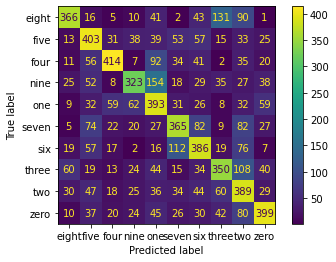

In [9]:
# Naive Bayes gaussiano
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X_test)
predictions=gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,predictions))

In [126]:
# Analisis de componentes principales varianza 95%
pca = PCA(0.95)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, df[['digit']].iloc[0:16566]], axis = 1)

In [168]:
finalDf['digit'].value_counts(normalize=True)

zero     0.143426
two      0.143245
four     0.143185
one      0.143064
six      0.142581
five     0.142279
three    0.142219
Name: digit, dtype: float64

In [122]:
# Proyectando x sobre el espacio de dimension reducida
train_x = pca.transform(X)
test_x = pca.transform(X_test)
train_x.shape,test_x.shape

((16566, 53), (7100, 53))

              precision    recall  f1-score   support

       eight       0.57      0.62      0.60       705
        five       0.71      0.62      0.66       707
        four       0.74      0.67      0.70       712
        nine       0.62      0.50      0.55       709
         one       0.47      0.64      0.55       711
       seven       0.60      0.61      0.60       713
         six       0.61      0.55      0.58       711
       three       0.49      0.56      0.52       707
         two       0.51      0.55      0.53       712
        zero       0.77      0.63      0.69       713

    accuracy                           0.60      7100
   macro avg       0.61      0.60      0.60      7100
weighted avg       0.61      0.60      0.60      7100



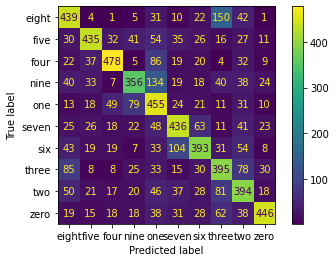

In [78]:
# Naive Bayes gaussiano para datos reducidos, mejora la performance
gnb2 = GaussianNB()
y_pred = gnb2.fit(train_x, y).predict(test_x)
predictions_pca=gnb2.predict(test_x)
plot_confusion_matrix(gnb2, test_x, y_test)
print(classification_report(y_test,predictions_pca))

              precision    recall  f1-score   support

       eight       0.64      0.54      0.58       705
        five       0.44      0.49      0.46       707
        four       0.59      0.49      0.54       712
        nine       0.54      0.40      0.46       709
         one       0.47      0.40      0.43       711
       seven       0.49      0.40      0.44       713
         six       0.38      0.62      0.47       711
       three       0.53      0.31      0.39       707
         two       0.32      0.46      0.38       712
        zero       0.46      0.54      0.50       713

    accuracy                           0.46      7100
   macro avg       0.49      0.46      0.47      7100
weighted avg       0.49      0.46      0.47      7100



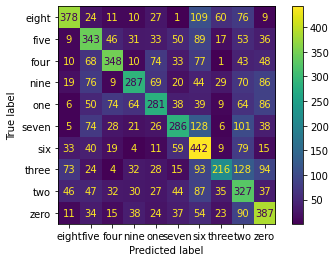

In [79]:
# Naive Bayes likelihood Bernoulli
gnb = BernoulliNB ()
y_pred = gnb.fit(X, y).predict(X_test)
gnb.classes_
gnb.get_params()

predictions=gnb.predict(X_test)
plot_confusion_matrix(gnb, X_test, y_test)
print(classification_report(y_test,predictions))

In [127]:
# Ahora el naive bayes manual


# Distro normal
def prob_standard_normal(x):
  return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
def prob_normal(x,mean,std):
  return prob_standard_normal((x-mean)/std)/std

# funcion que fitea gaussianas para cada clase
def fit_gaussiannb(dataset):
  priors = dataset['digit'].value_counts(normalize=True)
  means = dataset.groupby('digit').mean()
  stds = dataset.groupby('digit').std()
  return priors,means,stds

In [17]:
# funcion que calcula el likelihood
def get_likelihoods(x,means,stds):
  features = means.columns
  target_names = means.index
  likelihoods = []
  for target in target_names:
    likelihood_target = 1
    for i,feat in enumerate(features):
      std = stds[feat].loc[target]
      mean = means[feat].loc[target]
      likelihood_target = likelihood_target*prob_normal(x[i],mean,std)
    likelihoods.append(likelihood_target)
  return likelihoods, target_names

In [18]:
# posteriors y prediccion

def get_posteriors(x,means,stds,priors):
  likelihoods, target_names = get_likelihoods(x,means,stds)
  posteriors = likelihoods*priors
  return posteriors, target_names

def predict(x,means,stds,priors):
  posteriors, target_names = get_posteriors(x,means,stds,priors)
  return target_names[np.argmax(posteriors)]

In [23]:
priors,means,stds = fit_gaussiannb()

y_pred = [predict(x,means,stds,priors) for x in X_test]

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       eight       0.69      0.54      0.60       705
        five       0.52      0.58      0.55       707
        four       0.69      0.59      0.63       712
        nine       0.60      0.46      0.52       709
         one       0.44      0.56      0.50       711
       seven       0.56      0.53      0.54       713
         six       0.51      0.56      0.54       711
       three       0.55      0.48      0.51       707
         two       0.40      0.57      0.47       712
        zero       0.65      0.57      0.61       713

    accuracy                           0.54      7100
   macro avg       0.56      0.54      0.55      7100
weighted avg       0.56      0.54      0.55      7100



Text(14.5, 0.5, 'Verdadero')

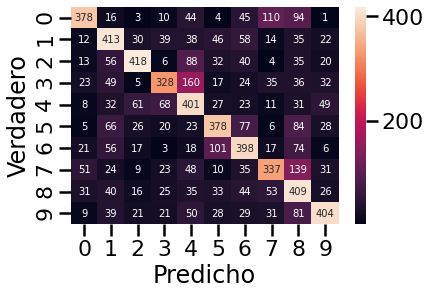

In [45]:
# matriz de confusion

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',annot_kws={"size": 10},xticklabels=1, yticklabels=1)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')

In [182]:
# Con PCA

pcatrain_x = pd.DataFrame(train_x)
df_pca_train = pd.concat([pcatrain_x, df[['digit']].iloc[0:len(train_x)]], axis = 1)

priors,means,stds = fit_gaussiannb(df_pca_train)
means.index

Index(['five', 'four', 'one', 'six', 'three', 'two', 'zero'], dtype='object', name='digit')

In [185]:
likelihoods = []
likelihoods, target_names = [get_likelihoods(x,means,stds) for x in test_x]   

ValueError: too many values to unpack (expected 2)

In [184]:
test_x.shape

(7100, 53)